In [100]:
# Carregando bibliotecas
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 

In [101]:
# Carregando o arquivo 'Mall_Customers.csv' para a variável df
df = pd.read_csv('Mall_Customers.csv') 

# Imprimindo as 5 primeiras linhas do dataframe
df.head() 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
# Fazendo a estatística 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [103]:
# Identificando a quantidade de linhas e colunas
df.shape

(200, 5)

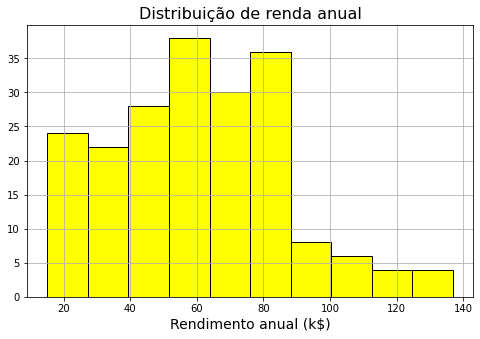

In [105]:
# Plotando num histograma a distribuição de renda anual
plt.figure(figsize=(8,5))
plt.title("Distribuição de renda anual",fontsize=16)
plt.xlabel ("Rendimento anual (k$)",fontsize=14)
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color='yellow',edgecolor='k')
plt.show()

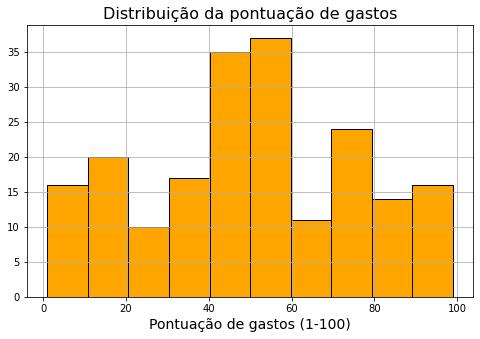

In [106]:
# Plotando num histograma a distribuição da pontuação de gastos
plt.figure(figsize=(8,5))
plt.title("Distribuição da pontuação de gastos",fontsize=16)
plt.xlabel ("Pontuação de gastos (1-100)",fontsize=14)
plt.grid(True)
plt.hist(df['Spending Score (1-100)'],color='orange',edgecolor='k')
plt.show()

In [87]:
# Utilizei o método corr() para encontrar a matriz de correlação utilizando o método Pearson.
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


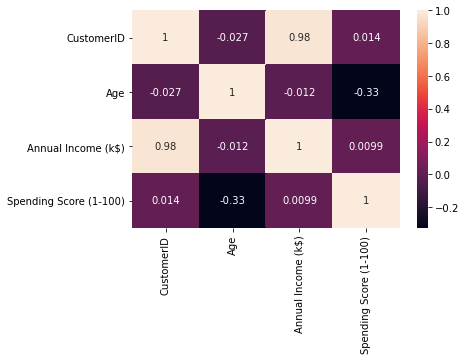

In [88]:
# Utilizei o heatmap para exibir os valores de correlação no mapa de calor.
sns.heatmap(df.corr(), annot=True)

In [89]:
# Criei um array e exclui a linha no índice 0, ou seja, primeira linha.
X = df.iloc[:,[3,4]].values

In [90]:
newData = df.iloc[:, [1, 2]].values # extract the two features from our dataset

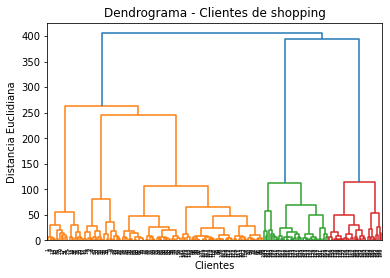

In [107]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrograma - Clientes de shopping') # Título do dendrograma
plt.xlabel('Clientes') # Rótulo do eixo X
plt.ylabel('Distancia Euclidiana') # Rótulo do eixo y
plt.show() # visualizar o gráfico

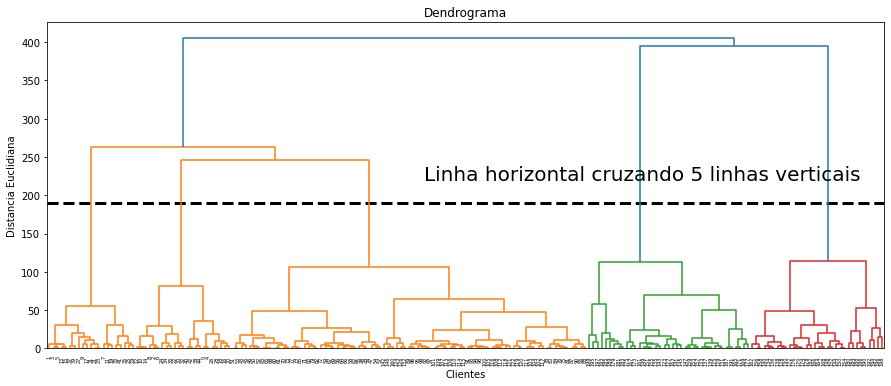

In [92]:
plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Linha horizontal cruzando 5 linhas verticais',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [93]:
# Construindo o modelo
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

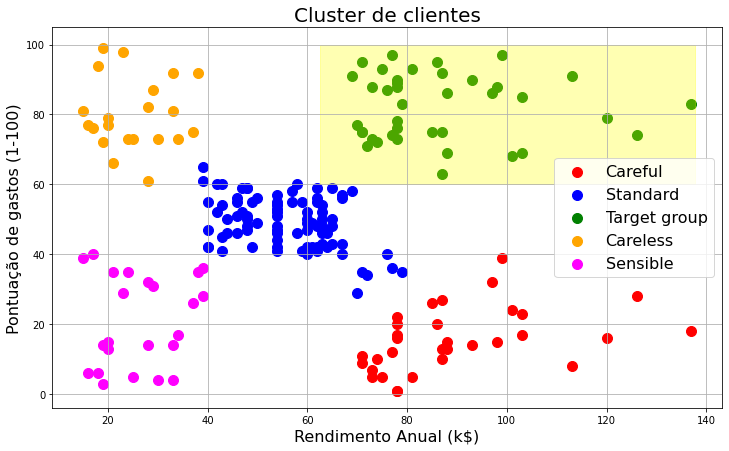

In [94]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Cluster de clientes',fontsize=20)
plt.xlabel('Rendimento Anual (k$)',fontsize=16)
plt.ylabel('Pontuação de gastos (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

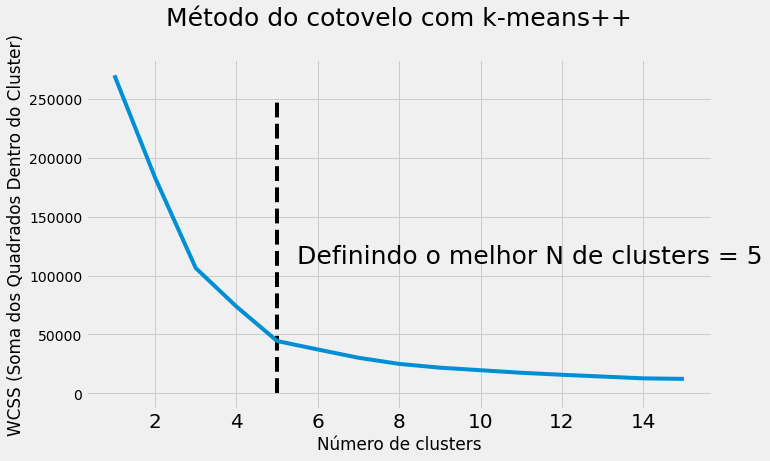

In [95]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('Método do cotovelo com k-means++\n',fontsize=25)
    plt.xlabel('Número de clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (Soma dos Quadrados Dentro do Cluster)')
    plt.vlines(x=5,ymin=0,ymax=250000,linestyles='--')
    plt.text(x=5.5,y=110000,s='Definindo o melhor N de clusters = 5',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

In [96]:
# Criado uma coluna chamada 'N_CLUSTER' e incluindo os rótulos no dataframe
df['N_CLUSTER'] = pd.Series(y_hc)

In [97]:
# Trazendo as 5 primeiras linhas com o head()
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),N_CLUSTER
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [98]:
# Diante da clusterização feita utilizando o Hierarchical Clustering esse foi o resultado obtido:
df['N_CLUSTER'].value_counts() 

1    85
2    39
0    32
4    23
3    21
Name: N_CLUSTER, dtype: int64